In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster',rc={"lines.linewidth":1})

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import kid_readout.analysis.archive

no data directory set up for clouds defaulting to /data
updated file list


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
import glob

In [5]:
fns = glob.glob('/artemis/readout/pkl/2016-02-2*sweep*.pkl')
fns.sort()
print fns

['/artemis/readout/pkl/2016-02-20_134726_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-20_141931_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-20_144433_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-20_150937_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-20_165810_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-20_213543_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-21_102821_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-21_104917_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-21_153247_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-21_170859_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-21_191543_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-21_194932_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-02-21_203231_sweep_and_stream.pkl']


In [6]:
df = kid_readout.analysis.archive.build_simple_archive(fns)

In [7]:
df.shape

(3840, 92)

1.24066876864 1038.95334005 14170.7508305 nan 0.170788699102
2.09742303134 1038.94586352 13816.596421 nan 0.170153839729
2.58481055837 1038.93866621 13413.9112897 nan 0.178635731292
2.99285919035 1038.92914614 13018.9263532 nan 0.188588330828
4.67275709846 1038.90349485 11788.80341 nan 0.18855046791
4.49521078165 1038.89503743 11573.0745143 nan 0.217691495074
4.99701496618 1038.88018998 11163.0300961 nan 0.239046390804
5.48328114016 1038.87010002 10867.1866331 nan 0.252334091026
5.98493403167 1038.85162338 10246.9174824 nan 0.258147618916
6.49726122586 1038.83511651 9781.11567606 nan 0.270632416449
1.4587734257 1038.92864091 11660.5497699 nan 0.281732892978
1.64586754721 1038.94201899 12584.3839685 nan 0.244407348984


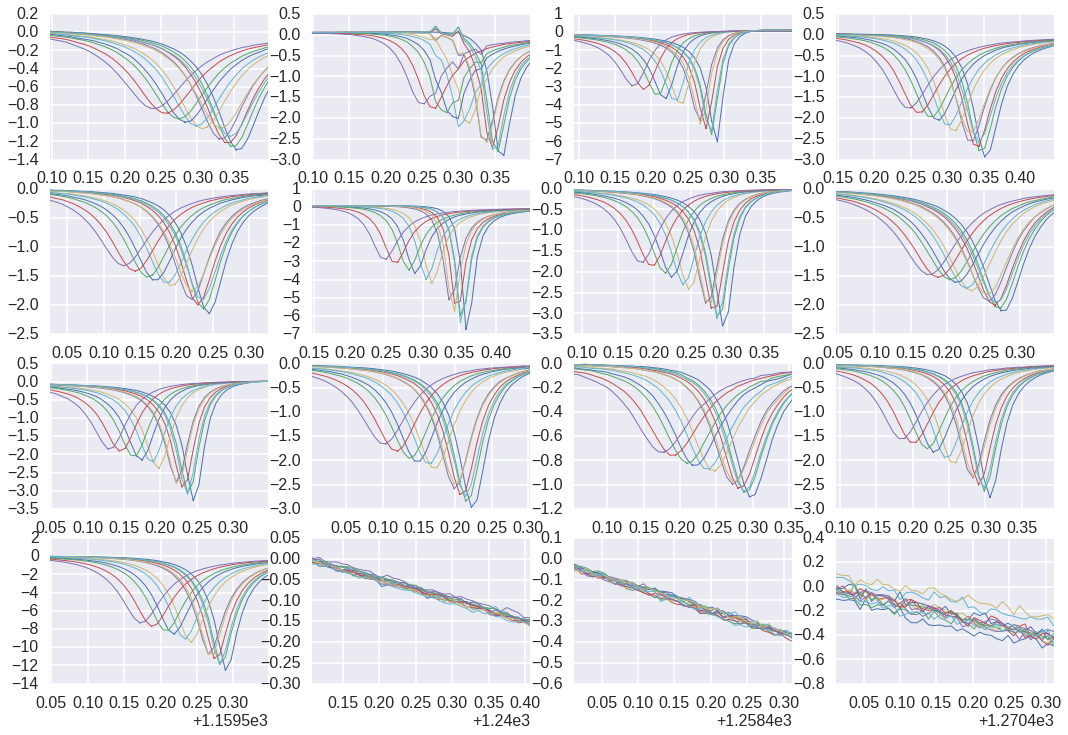

In [8]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1300)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21/row.A_mag)))
        if k==0:
            print row.sweep_primary_load_temperature,row.f_0,row.Q_i,row.a,row.sweep_primary_package_temperature
    ax.set_xlim(row.sweep_freqs_MHz.mean()-0.2,row.sweep_freqs_MHz.mean()+0.1)

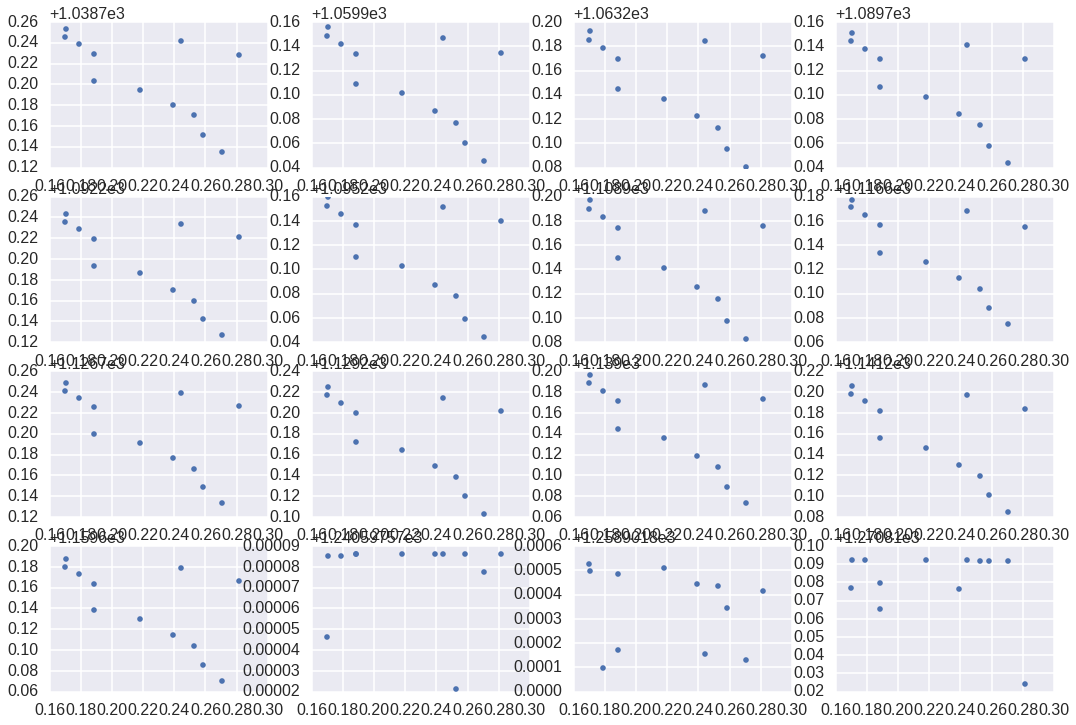

In [9]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 <1300)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    ax.plot(res.sweep_primary_package_temperature,res.f_0,'.')
#    ax.plot(res.sweep_primary_package_temperature,1e6/res.Q_i,'.')


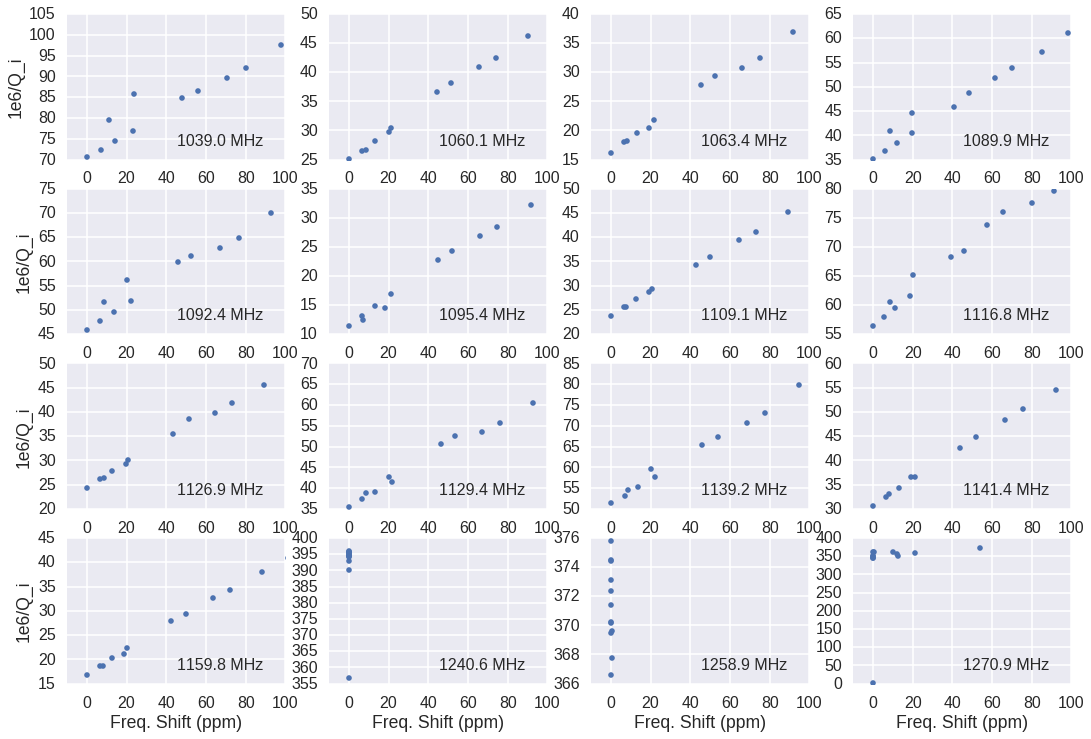

In [10]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 <1300)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    x = 1-res.f_0/res.f_0.max()
    ax.plot(1e6*x,1e6/res.Q_i,'.')
    ax.set_xlim(-10,100)
    #ax.set_ylim(0,40)
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
#    ax.plot(res.sweep_primary_package_temperature,1e6/res.Q_i,'.')
for k in range(4):
    axs[-1,k].set_xlabel('Freq. Shift (ppm)')
    axs[k,0].set_ylabel('1e6/Q_i')

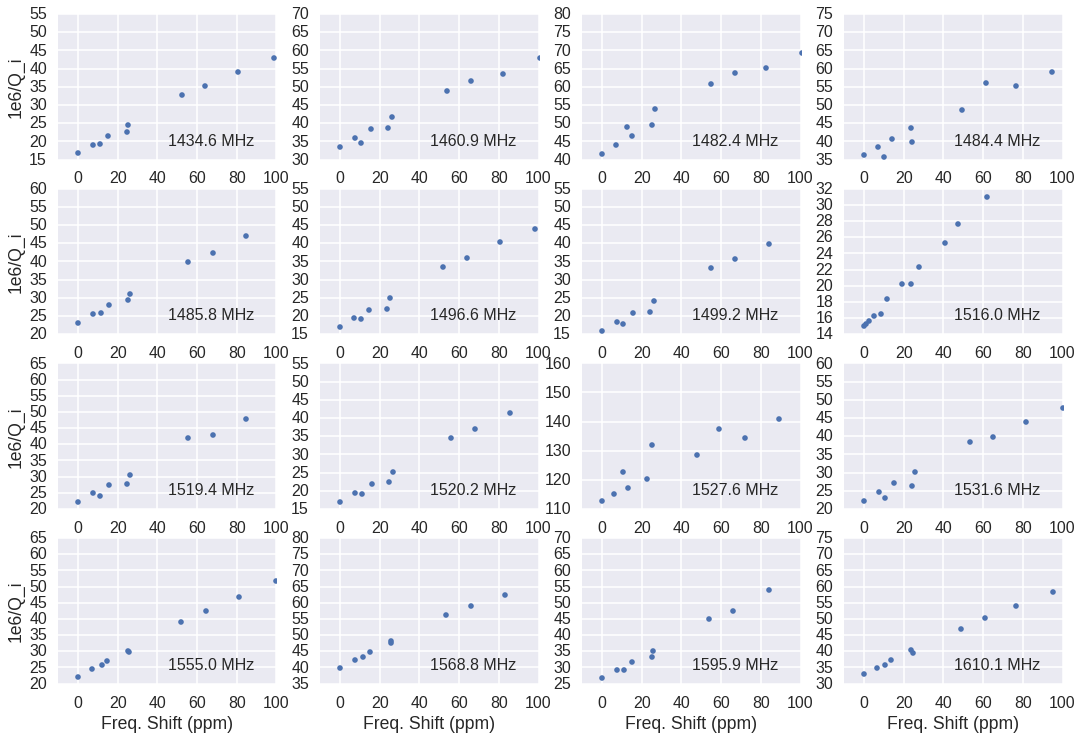

In [11]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 >1300)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    x = 1-res.f_0/res.f_0.max()
    ax.plot(1e6*x,1e6/res.Q_i,'.')
    ax.set_xlim(-10,100)
    #ax.set_ylim(0,40)
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
#    ax.plot(res.sweep_primary_package_temperature,1e6/res.Q_i,'.')
for k in range(4):
    axs[-1,k].set_xlabel('Freq. Shift (ppm)')
    axs[k,0].set_ylabel('1e6/Q_i')

1.26736226145 1434.56357776 59406.7662265 nan 0.167691768145
2.0812118543 1434.55302925 52370.0891174 nan 0.170720055823
2.50896423502 1434.54212786 46684.4341975 nan 0.180427814946
2.99766520172 1434.52742008 40907.9238487 nan 0.191209790194
4.02244780104 1434.48835047 30420.1516379 nan 0.195226058188
4.49351961824 1434.4718462 28505.9368077 nan 0.227583790385
5.00232063251 1434.44802696 25573.799936 nan 0.244329343817
5.49098114725 1434.42177888 23366.1039359 nan 0.268253327702
5.9984101468 1434.3997463 21126.1989239 nan 0.264038769901
6.49391958539 1434.37040741 19313.7876489 nan 0.278532636478
1.4968367068 1434.52794677 44425.2771358 nan 0.281738988829
1.68712205955 1434.54779344 52180.9037535 nan 0.244647530268


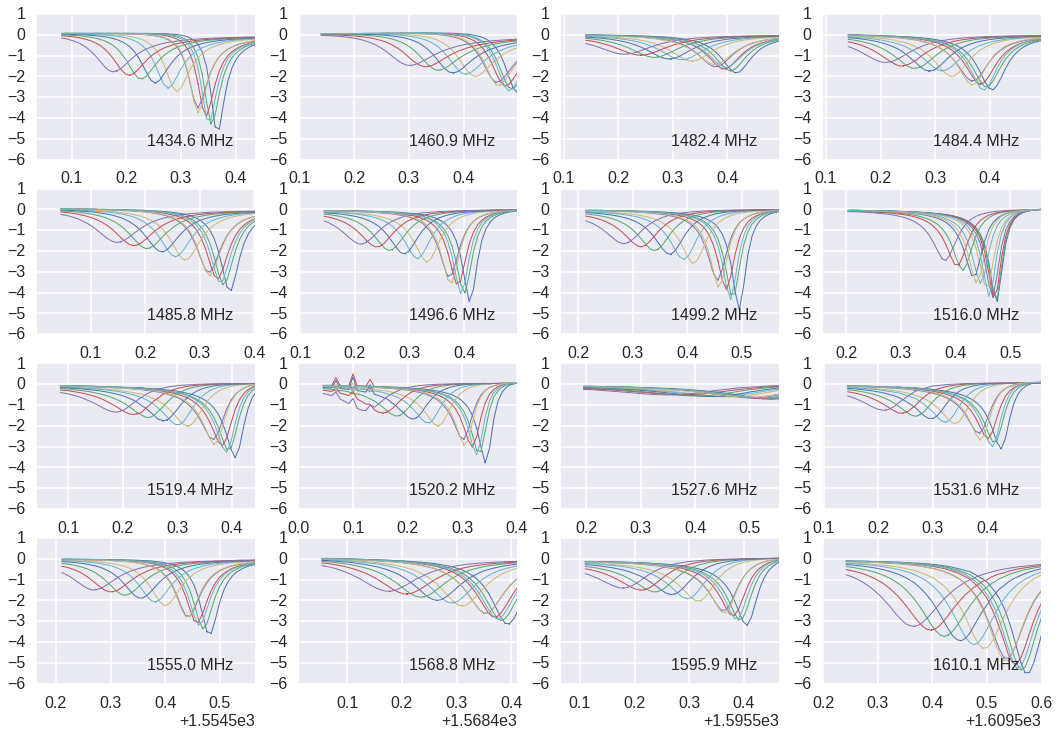

In [12]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1300)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21/row.A_mag)))
        if k==0:
            print row.sweep_primary_load_temperature,row.f_0,row.Q_i,row.a,row.sweep_primary_package_temperature
    ax.set_xlim(row.sweep_freqs_MHz.mean()-0.3,row.sweep_freqs_MHz.mean()+0.1)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_ylim(-6,1)

1.24066876864 1038.95334005 14170.7508305 nan 0.170788699102
2.09742303134 1038.94586352 13816.596421 nan 0.170153839729
2.58481055837 1038.93866621 13413.9112897 nan 0.178635731292
2.99285919035 1038.92914614 13018.9263532 nan 0.188588330828
4.67275709846 1038.90349485 11788.80341 nan 0.18855046791
4.49521078165 1038.89503743 11573.0745143 nan 0.217691495074
4.99701496618 1038.88018998 11163.0300961 nan 0.239046390804
5.48328114016 1038.87010002 10867.1866331 nan 0.252334091026
5.98493403167 1038.85162338 10246.9174824 nan 0.258147618916
6.49726122586 1038.83511651 9781.11567606 nan 0.270632416449
1.4587734257 1038.92864091 11660.5497699 nan 0.281732892978
1.64586754721 1038.94201899 12584.3839685 nan 0.244407348984


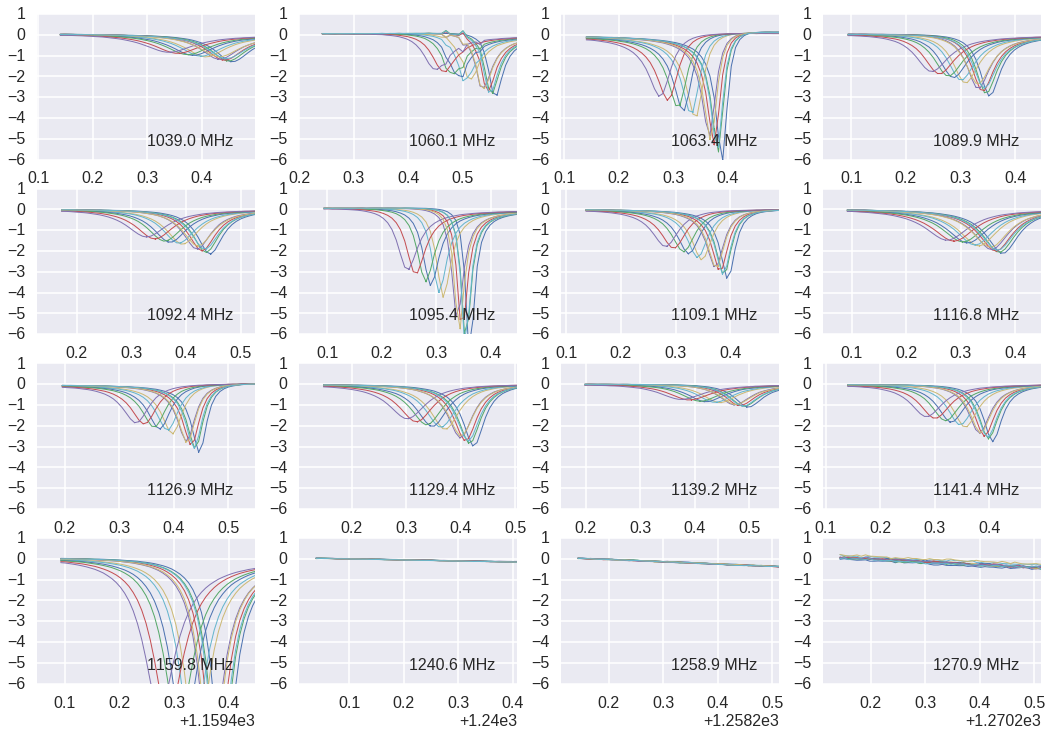

In [13]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1300)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21/row.A_mag)))
        if k==0:
            print row.sweep_primary_load_temperature,row.f_0,row.Q_i,row.a,row.sweep_primary_package_temperature
    ax.set_xlim(row.sweep_freqs_MHz.mean()-0.3,row.sweep_freqs_MHz.mean()+0.1)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.text(0.9,0.1,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_ylim(-6,1)

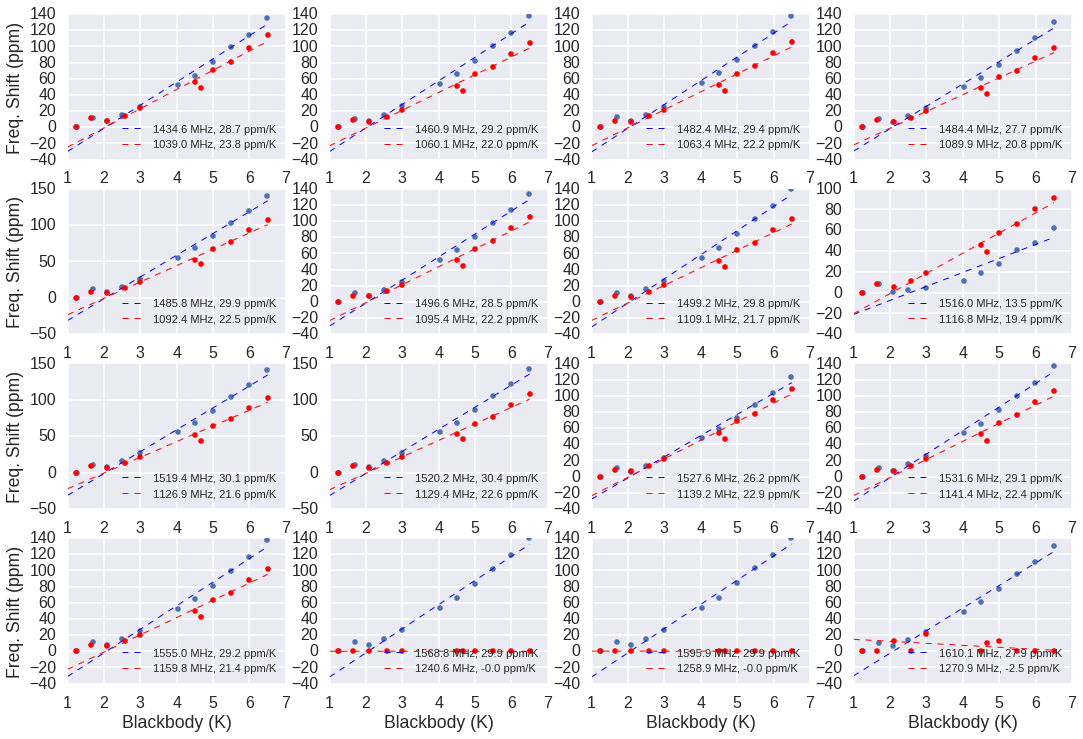

In [14]:
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1300) & (df.sweep_primary_package_temperature < 0.28)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    Tbb = res.sweep_primary_load_temperature
    xppm = 1e6*(1-res.f_0/res.f_0.max())
    ax.plot(Tbb,xppm,'.',label='')
    mask = (Tbb > 2)# & (xppm < 10)
    if mask.sum():
        pp = np.polyfit(Tbb[mask],xppm[mask],1)
        T = np.linspace(1,6.5,10)
        ax.plot(T,np.polyval(pp,T),'b--',label=('%.1f MHz, %.1f ppm/K' % (res.f_0.iloc[0],pp[0])))

    #ax.set_ylim(0,10)
dd = df[(df.atten==20.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1300) & (df.sweep_primary_package_temperature < 0.28)]
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    Tbb = res.sweep_primary_load_temperature
    xppm = 1e6*(1-res.f_0/res.f_0.max())
    ax.plot(Tbb,xppm,'r.',label='')
    mask = (Tbb > 2)# & (xppm < 10)
    if mask.sum():
        pp = np.polyfit(Tbb[mask],xppm[mask],1)
        T = np.linspace(1,6.5,10)
        ax.plot(T,np.polyval(pp,T),'r--',label=('%.1f MHz, %.1f ppm/K' % (res.f_0.iloc[0],pp[0])))
    ax.legend(loc='lower right',prop=dict(size='x-small'))

for k in range(4):
    axs[-1,k].set_xlabel('Blackbody (K)')
    axs[k,0].set_ylabel('Freq. Shift (ppm)')

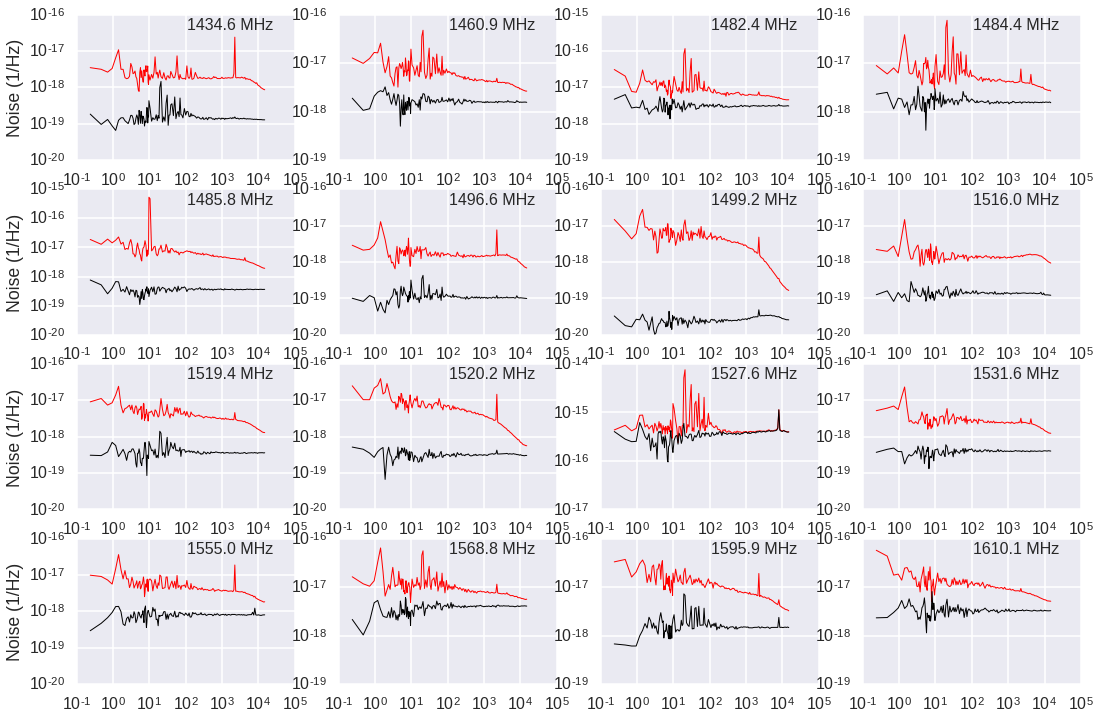

In [15]:
dd = df[(df.atten==2.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1300) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:],'r')
        ax.loglog(row.pca_freq,row.pca_eigvals[0,:],'k')
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    
for k in range(4):
    axs[k,0].set_ylabel('Noise (1/Hz)')

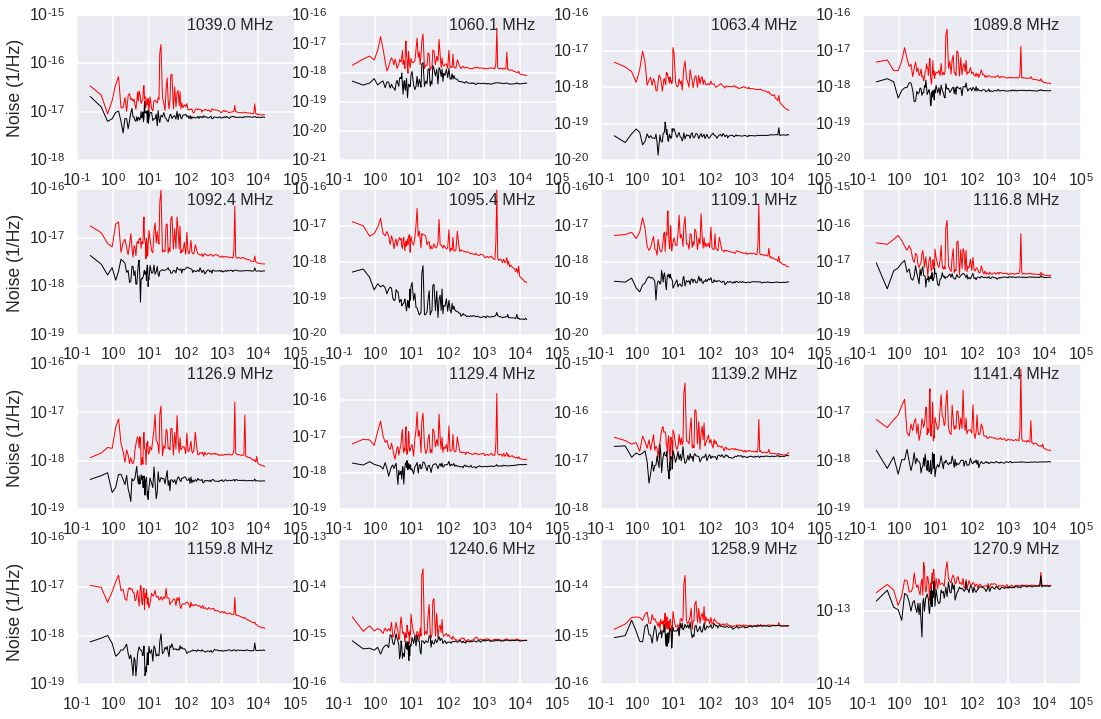

In [16]:
dd = df[(df.atten==0.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1300) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:],'r')
        ax.loglog(row.pca_freq,row.pca_eigvals[0,:],'k')
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    
for k in range(4):
    axs[k,0].set_ylabel('Noise (1/Hz)')

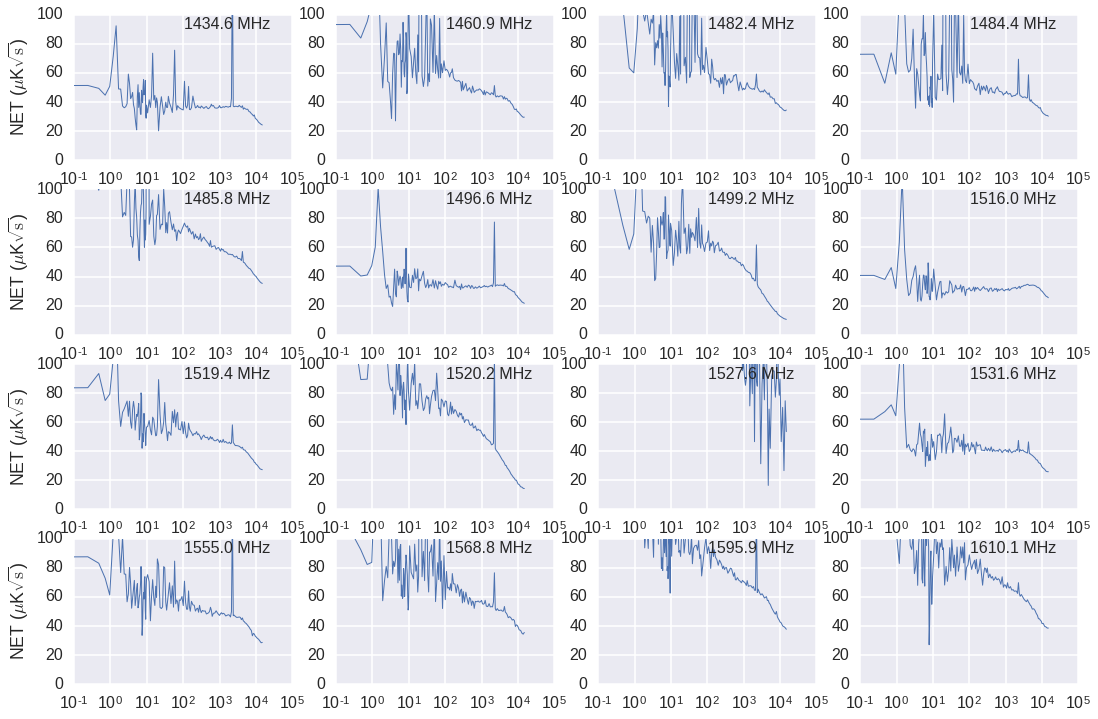

In [17]:
dd = df[(df.atten==2.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 > 1300) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        per_rt_hz = np.sqrt(row.pca_eigvals[1,:]-row.pca_eigvals[0,:])
        net = per_rt_hz/(25e-6)/np.sqrt(2) # 2ppm/K
        ax.loglog(row.pca_freq,net*1e6)
#        ax.loglog(row.pca_freq,row.pca_eigvals[0,:])
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_xscale('log')
    ax.set_yscale('linear')
    ax.set_ylim(0,100)
        
for k in range(4):
    axs[k,0].set_ylabel('NET ($\mu$K$\sqrt{\mathrm{s}}$)')

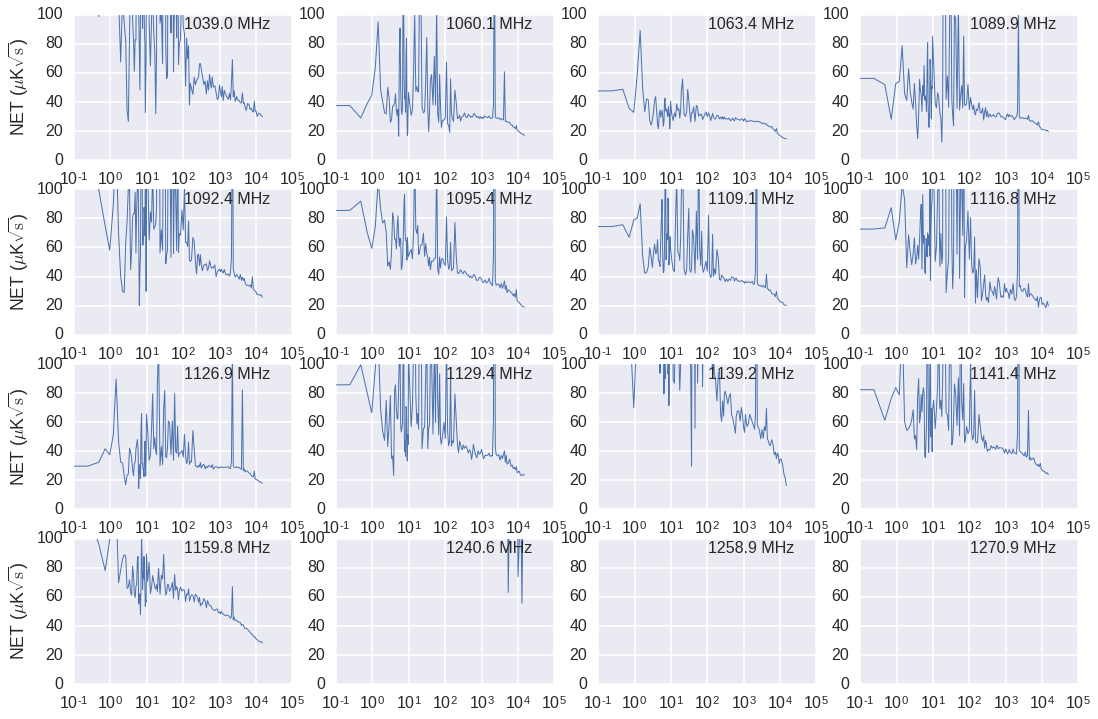

In [18]:
dd = df[(df.atten==2.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1300) & (df.sweep_primary_package_temperature<.2) &
       (df.sweep_primary_load_temperature<2)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        per_rt_hz = np.sqrt(row.pca_eigvals[1,:]-row.pca_eigvals[0,:])
        net = per_rt_hz/(25e-6)/np.sqrt(2) # 2ppm/K
        ax.loglog(row.pca_freq,net*1e6)
#        ax.loglog(row.pca_freq,row.pca_eigvals[0,:])
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    ax.set_xscale('log')
    ax.set_yscale('linear')
    ax.set_ylim(0,100)
        
for k in range(4):
    axs[k,0].set_ylabel('NET ($\mu$K$\sqrt{\mathrm{s}}$)')

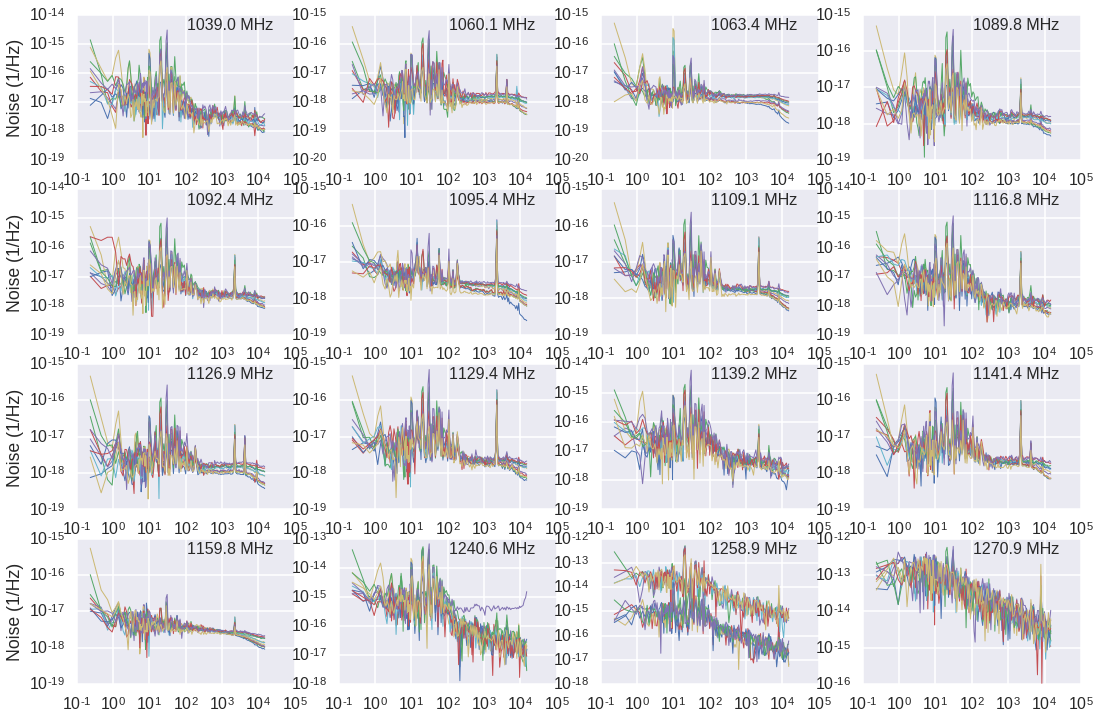

In [19]:
dd = df[(df.atten==0.0) & (df.timestream_modulation_duty_cycle==1) & (df.f_0 < 1300) & (df.sweep_primary_package_temperature<.27) &
       (df.sweep_primary_load_temperature<20)]
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    res = dd[dd.resonator_id==k]
    for m,row in res.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:])#,'r')
        #ax.loglog(row.pca_freq,row.pca_eigvals[0,:],'k')
    ax.text(0.9,0.9,('%.1f MHz' % res.f_0.iloc[0]),transform=ax.transAxes,ha='right')
    
for k in range(4):
    axs[k,0].set_ylabel('Noise (1/Hz)')

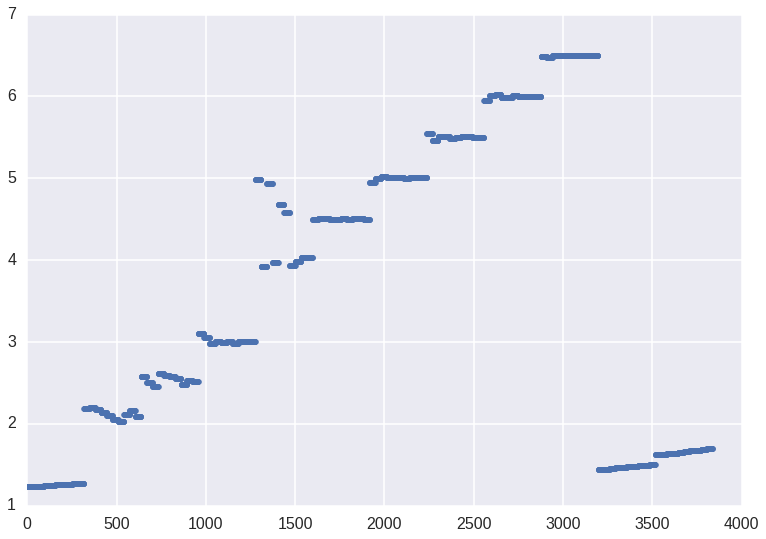

In [20]:
plot(df.sweep_primary_load_temperature,'.')

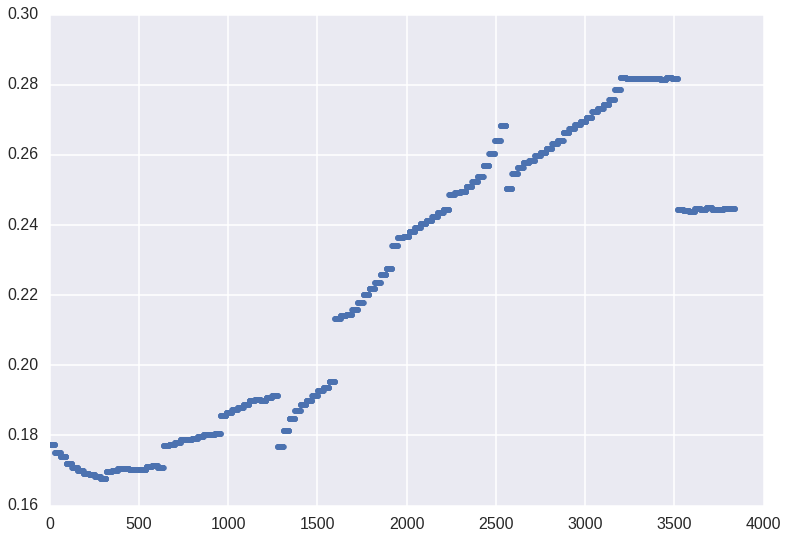

In [21]:
plot(df.sweep_primary_package_temperature,'.')

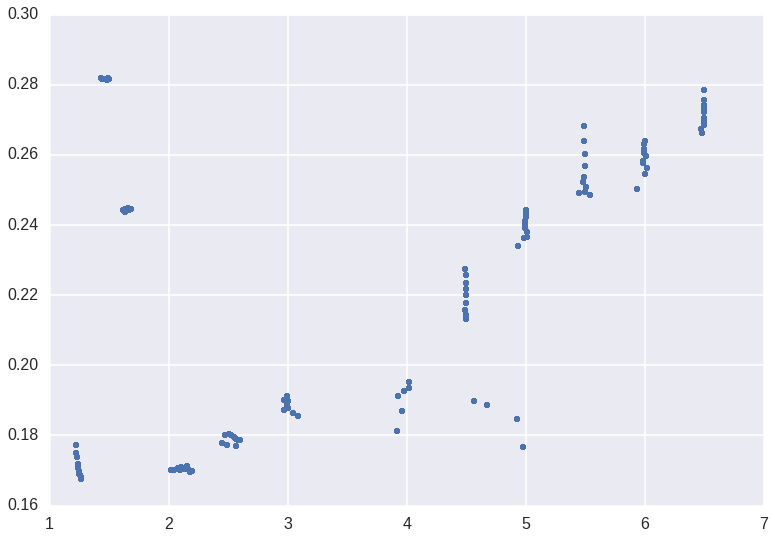

In [22]:
plot(df.sweep_primary_load_temperature,df.sweep_primary_package_temperature,'.')

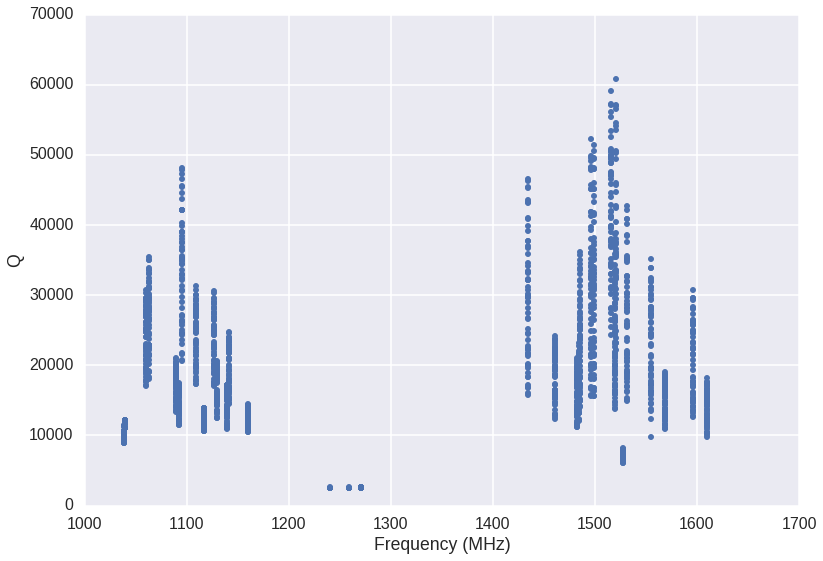

In [23]:
plot(df.f_0,df.Q,'.')
ylim(0,7e4)
xlabel('Frequency (MHz)')
ylabel('Q')